<a href="https://colab.research.google.com/github/Shikha18Shukla/Machine_Learning_repo/blob/main/ML_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 8 : Use Logistic Regression and Decision Tree with 10-fold CV on Titanic dataset. Plot learning curves and discuss bias-variance tradeoff.

** Step 1 : We load all required modules for data handling, modeling, scaling, CV, and plotting.**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


**Step 2 : We use the Titanic dataset which contains age, sex, class and survival information**

In [2]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Step 3: Data Preprocessing (choose relevant features, convert categorical columns to numbers, and separate features and target.)**

In [3]:
# Select useful columns
df = titanic[["survived", "pclass", "sex", "age", "fare", "alone"]].dropna()

# Convert categorical -> numeric
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["alone"] = df["alone"].astype(int)

# Features and target
X = df.drop("survived", axis=1)
y = df["survived"]


**Step 4 : Train-test split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


** Step 5 : Logistic Regression with 10-fold CV**

In [5]:
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

scores_lr = cross_val_score(log_reg, X_train, y_train, cv=10)
print("Logistic Regression 10-Fold Accuracy:", scores_lr.mean())


Logistic Regression 10-Fold Accuracy: 0.8055656382335148


**Step 6: Decision Tree with 10-fold CV**

In [6]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

scores_dt = cross_val_score(dt, X_train, y_train, cv=10)
print("Decision Tree 10-Fold Accuracy:", scores_dt.mean())


Decision Tree 10-Fold Accuracy: 0.8126134301270417


**Step 7: Fit both models**

In [7]:
log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)

pred_lr = log_reg.predict(X_test)
pred_dt = dt.predict(X_test)

print("Test Accuracy (LogReg):", accuracy_score(y_test, pred_lr))
print("Test Accuracy (Decision Tree):", accuracy_score(y_test, pred_dt))


Test Accuracy (LogReg): 0.7342657342657343
Test Accuracy (Decision Tree): 0.7552447552447552


**Step8: Function to plot Learning Curves**

In [9]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=10, scoring="accuracy",
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.figure(figsize=(7,4))
    plt.plot(train_sizes, train_mean, marker='o', label="Train Score")
    plt.plot(train_sizes, val_mean, marker='s', label="Validation Score")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


**Step 9: Learning Curves**


 1) Logistic Regression

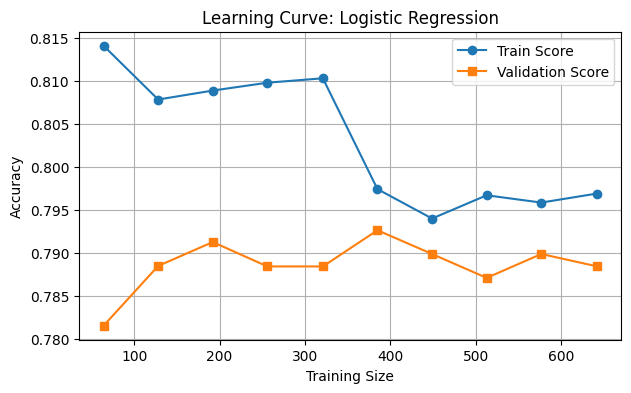

In [10]:
plot_learning_curve(log_reg, X, y, "Learning Curve: Logistic Regression")


2) Decision Tree

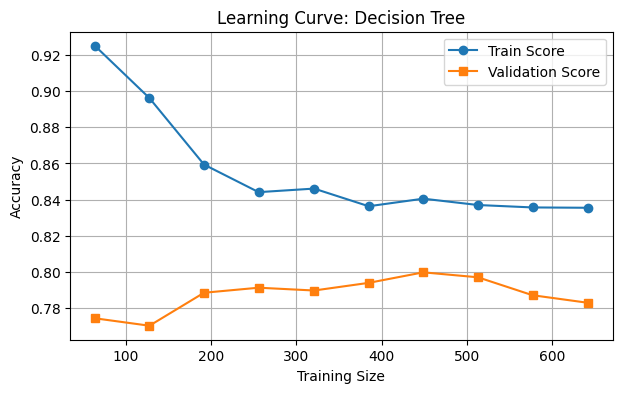

In [11]:
plot_learning_curve(dt, X, y, "Learning Curve: Decision Tree")


**Step 10 : Bias–Variance Tradeoff Explanation**

In [12]:
print("""
Bias–Variance Tradeoff:

1. Logistic Regression:
   • The curves usually show both training and validation scores close.
   • This means the model is stable and does not overfit.
   • High bias but low variance.
   • Good generalization, but limited flexibility.

2. Decision Tree:
   • Training score is usually much higher than validation score.
   • This shows overfitting tendency.
   • Low bias but high variance.
   • The model captures complex patterns but becomes unstable.

Summary:
- Logistic Regression generalizes better on this dataset.
- Decision Tree needs regularization (max_depth) to reduce variance.
""")



Bias–Variance Tradeoff:

1. Logistic Regression:
   • The curves usually show both training and validation scores close.
   • This means the model is stable and does not overfit.
   • High bias but low variance.
   • Good generalization, but limited flexibility.

2. Decision Tree:
   • Training score is usually much higher than validation score.
   • This shows overfitting tendency.
   • Low bias but high variance.
   • The model captures complex patterns but becomes unstable.

Summary:
- Logistic Regression generalizes better on this dataset.
- Decision Tree needs regularization (max_depth) to reduce variance.

